In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import warnings

from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

In [ ]:
 Hdf=pd.read_csv('/content/archive (5).zip',on_bad_lines='skip',encoding='ISO-8859-1')

In [ ]:
df.shape

(181691, 135)

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#extracting columns
columns=['iyear','imonth','iday','country_txt','city','latitude','longitude','location','attacktype1_txt','targsubtype1_txt','target1',
         'gname','motive','weaptype1_txt','dbsource','region_txt','nkill','nwound','natltyl_txt','weapdetail']

In [ ]:
df_clean=pd.DataFrame(data=df,columns=columns)

In [ ]:
df_clean.shape

(181691, 20)

In [ ]:
df_clean.isnull().sum()

iyear                    0
imonth                   0
iday                     0
country_txt              0
city                   435
latitude              4556
longitude             4557
location            126196
attacktype1_txt          0
targsubtype1_txt     10373
target1                638
gname                    0
motive              131130
weaptype1_txt            0
dbsource                 0
region_txt               0
nkill                10313
nwound               16311
natltyl_txt         181691
weapdetail           67670
dtype: int64

In [ ]:
df_clean.head()

,iyear,imonth,iday,country_txt,city,latitude,longitude,location,attacktype1_txt,targsubtype1_txt,target1,gname,motive,weaptype1_txt,dbsource,region_txt,nkill,nwound,natltyl_txt,weapdetail
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,NaN,NaN
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,NaN,NaN
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,NaN,NaN
3,1970,1,0,Greece,Athens,37.997490,23.762728,NaN,Bombing/Explosion,Embassy/Consulate,U.S. Embassy,Unknown,NaN,Explosives,PGIS,Western Europe,NaN,NaN,NaN,Explosive
4,1970,1,0,Japan,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,Embassy/Consulate,U.S. Consulate,Unknown,NaN,Incendiary,PGIS,East Asia,NaN,NaN,NaN,Incendiary


In [ ]:
df_clean.rename(columns={'iyear':'year' , 'imonth':'month' ,'iday':'day','country_txt':'country name','attacktype1_txt':'attacktype','targtype1_txt':'targtype','targsubtype2':'targsubtype2',
              'gname':'group_name','weaptype1_txt':'weaptype','dbsource':'source','region_txt':'region1','nkill':'Killed','nwound':'Wounded','weapdetail':'weapon_detail','natlty1_txt':'nationality'
 } , inplace=True)

In [ ]:
pd.set_option("display.max_columns",500)

In [ ]:
df_clean.head()

,year,month,day,country name,city,latitude,longitude,location,attacktype,targetype,targsubtype1,target,group_name,motive,weaptype,source,regionl,killed,wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,NaN,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),NaN,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,NaN,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN,1.0
3,1970,1,0,Greece,Athens,37.997490,23.762728,NaN,Bombing/Explosion,NaN,Embassy/Consulate,U.S. Embassy,Unknown,NaN,Explosives,PGIS,Western Europe,NaN,NaN,United States,Explosive,NaN
4,1970,1,0,Japan,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,NaN,Embassy/Consulate,U.S. Consulate,Unknown,NaN,Incendiary,PGIS,East Asia,NaN,NaN,United States,Incendiary,NaN


In [ ]:
df_clean['casualities']=df_clean['wounded']+df_clean['killed']

In [ ]:
df_clean.head()

,year,month,day,country name,city,latitude,longitude,location,attacktype,targetype,targsubtype1,target,group_name,motive,weaptype,source,regionl,killed,wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,NaN,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),NaN,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,NaN,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN,1.0
3,1970,1,0,Greece,Athens,37.997490,23.762728,NaN,Bombing/Explosion,NaN,Embassy/Consulate,U.S. Embassy,Unknown,NaN,Explosives,PGIS,Western Europe,NaN,NaN,United States,Explosive,NaN
4,1970,1,0,Japan,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,NaN,Embassy/Consulate,U.S. Consulate,Unknown,NaN,Incendiary,PGIS,East Asia,NaN,NaN,United States,Incendiary,NaN


In [ ]:
nationality_top = df_clean[df_clean['nationality'] != 'Unknown']

In [ ]:
nationality_type=nationality_top['nationality'].value_counts().reset_index()

In [ ]:
nationality_type.rename(columns={"index":'Nationality','nationality':'Counts'},inplace=True)
nationality_type

,Counts,count
0,Iraq,24113
1,Pakistan,13900
2,India,12098
3,Afghanistan,10931
4,Colombia,7922
...,...,...
210,People's Republic of the Congo,1
211,Saba (Netherlands Antilles),1
212,Tuvalu,1
213,Western Sahara,1


In [ ]:
df_clean['nationality'].unique()

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Jordan', 'Ethiopia', 'Spain', nan,
       'Japan', 'International', 'Egypt', 'Paraguay', 'Soviet Union',
       'Ireland', 'Argentina', 'Philippines', 'China',
       'West Bank and Gaza Strip', 'Multinational', 'Northern Ireland',
       'Brazil', 'Haiti', 'South Africa', 'Portugal', 'Colombia',
       'Greece', 'Nicaragua', 'Indonesia', 'Yugoslavia', 'Italy',
       'Rhodesia', 'Ivory Coast', 'Iran', 'Canada', 'Poland', 'Sweden',
       'Turkey', 'Costa Rica', 'Russia', 'Iraq', 'Cuba', 'France',
       'Malawi', 'Democratic Republic of the Congo', 'Netherlands',
       'Chile', 'Hong Kong', 'Yemen', 'Mexico', 'Syria', 'India',
       'New Zealand', 'Senegal', 'Algeria', 'Peru', 'Czechoslovakia',
       'Saudi Arabia', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'Bolivia', 'El Salvador', 'Botswana', 'Guate

In [ ]:
terr= df_clean[df_clean['group_name'] != 'Unknown']
Terror_Group_Org=terr['group_name'].value_counts().reset_index()
Terror_Group_Org.rename(columns={"index":'Group_name','group_name':'Counts'},inplace=True)
Terror_Group_Org

,Counts,count
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
...,...,...
3531,Ansar Sarallah,1
3532,Sword of Islam,1
3533,Support of Ocalan-The Hawks of Thrace,1
3534,Arab Revolutionary Front,1


In [176]:
df_clean.head()

,year,month,day,country name,city,latitude,longitude,location,attacktype,targetype,targsubtype1,target,group_name,motive,weaptype,source,regionl,killed,wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,NaN,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),NaN,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,NaN,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN,1.0
3,1970,1,0,Greece,Athens,37.997490,23.762728,NaN,Bombing/Explosion,NaN,Embassy/Consulate,U.S. Embassy,Unknown,NaN,Explosives,PGIS,Western Europe,NaN,NaN,United States,Explosive,NaN
4,1970,1,0,Japan,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,NaN,Embassy/Consulate,U.S. Consulate,Unknown,NaN,Incendiary,PGIS,East Asia,NaN,NaN,United States,Incendiary,NaN


In [177]:
city1= df_clean[df_clean['city'] != 'Unknown']

In [178]:
city_cln=city1['city'].value_counts().reset_index()
city_cln.rename(columns={"index":'City_name','city':'Counts'},inplace=True)
city_cln

,Counts,count
0,Baghdad,7589
1,Karachi,2652
2,Lima,2359
3,Mosul,2265
4,Belfast,2171
...,...,...
36667,Hotwag,1
36668,Ostend,1
36669,Balughata,1
36670,Jikoyi,1


In [179]:
wp=df_clean[df_clean['weaptype'] != 'Unknown']
weaptype_cln=wp['weaptype'].value_counts().reset_index()
weaptype_cln.rename(columns={'index':'weapon_type','weaptype':'Counts'},inplace=True)
weaptype_cln

,Counts,count
0,Explosives,92426
1,Firearms,58524
2,Incendiary,11135
3,Melee,3655
4,Chemical,321
5,Sabotage Equipment,141
6,Vehicle (not to include vehicle-borne explosiv...,136
7,Other,114
8,Biological,35
9,Fake Weapons,33


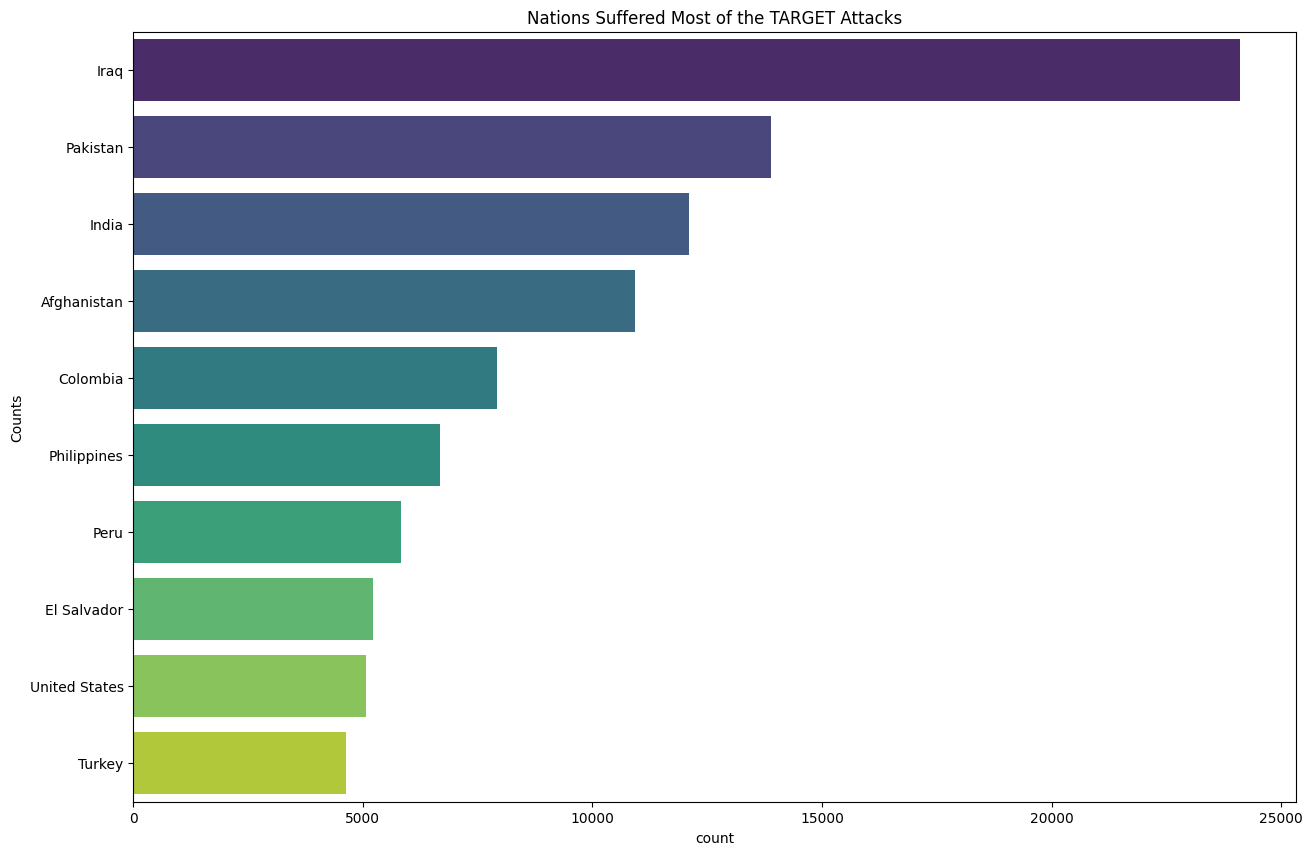

In [180]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="count", y="Counts", data=nationality_type[:10],
                 palette="viridis").set_title('Nations Suffered Most of the TARGET Attacks')

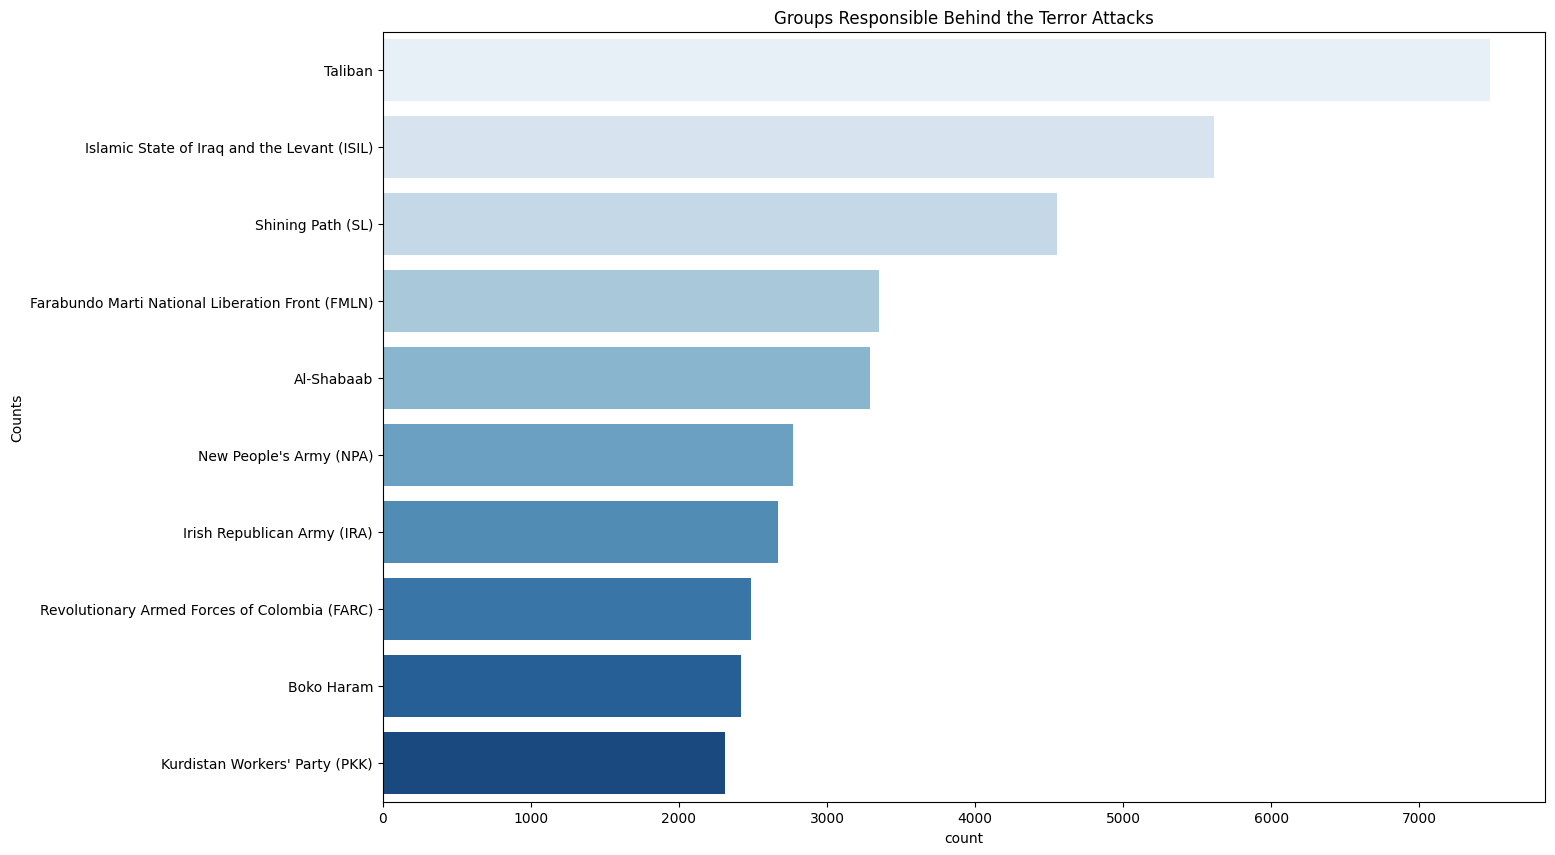

In [181]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="count", y="Counts", data=Terror_Group_Org[:10],
                 palette="Blues").set_title('Groups Responsible Behind the Terror Attacks')

In [183]:
#drop rows with missing latitude or longitude
df_geo=df.dropna(subset=['latitude','longitude'])
#create a base map
m=folium.Map(location=[0,0],zoom_start=2)
#adding incidents to the map
heat_data=[[row['latitude'],row['longitude']] for index,row in df_geo.iterrows()]
HeatMap(heat_data).add_to(m)
m
#save the map to an html file
m.save('terrorism_heatmap.html')